# **TechoServe Customer Satisfaction Analysis (Factor Analysis)**

APLICACIÓN DE MÉTODOS MULTIVARIADOS EN CIENCIA DE DATOS

MA2003B.601

**Authors:**
* Mauricio Loera Abundis
* Gerardo Javier López García
* Emilio Guillen Ramírez

## 1. Contexto del Negocio
**Cliente:** TechnoServe (Empresa de Servicios Tecnológicos B2B)

**Problema:** La empresa recopila múltiples métricas de satisfacción (23 variables), pero es difícil tomar decisiones estratégicas con tantos indicadores sueltos.

**Objetivo:** Identificar las dimensiones latentes (factores) que realmente impulsan la satisfacción y la lealtad del cliente para priorizar acciones de mejora.

In [6]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 2. Carga y Exploración de Datos

In [7]:
# Cargar y explorar el dataset
df = pd.read_csv("../data/customer_satisfaction_data.csv")
print("----------------------------------------------------------------\n")
print("PRIMERAS FILAS:\n")
display(df.head())
print("----------------------------------------------------------------\n")
print("INFORMACIÓN GENERAL:\n")
display(df.info())
print("----------------------------------------------------------------\n")
print("ESTADÍSTICAS DESCRIPTIVAS:\n")
display(df.describe())
print("----------------------------------------------------------------\n")
print("VALORES NULOS:\n")
display(df.isnull().sum())
display((df.isnull().mean()*100).round(2).sort_index(ascending=False))

----------------------------------------------------------------

PRIMERAS FILAS:



,customer_id,quarter,survey_date,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,...,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
0,CUST_001,Q1_2024,2024-03-22,5.0,6.0,4.0,5.0,4.0,5.0,5.0,...,4.0,4.0,2.0,6.0,6.0,4,6,4,12.3,1
1,CUST_002,Q1_2024,2024-03-20,5.0,3.0,4.0,5.0,5.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4,5,3,17.8,0
2,CUST_003,Q1_2024,2024-03-17,4.0,3.0,4.0,3.0,4.0,4.0,3.0,...,4.0,4.0,3.0,4.0,3.0,3,4,3,-7.8,0
3,CUST_004,Q1_2024,2024-03-08,3.0,4.0,4.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.0,4.0,4,5,2,-13.4,0
4,CUST_005,Q1_2024,2024-03-12,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,6.0,5.0,4.0,5.0,4.0,5,5,4,3.7,2


----------------------------------------------------------------

INFORMACIÓN GENERAL:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 3400 non-null   object 
 1   quarter                     3400 non-null   object 
 2   survey_date                 3400 non-null   object 
 3   account_manager_responsive  3384 non-null   float64
 4   billing_accuracy            3387 non-null   float64
 5   budget_control              3383 non-null   float64
 6   change_management           3388 non-null   float64
 7   communication_clarity       3384 non-null   float64
 8   competitive_pricing         3385 non-null   float64
 9   cost_transparency           3390 non-null   float64
 10  documentation_help          3386 non-null   float64
 11  executive_access            3390 non-null   float64
 12  in

None

----------------------------------------------------------------

ESTADÍSTICAS DESCRIPTIVAS:



,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,documentation_help,executive_access,innovation_solutions,...,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
count,3384.000000,3387.000000,3383.000000,3388.000000,3384.000000,3385.000000,3390.000000,3386.000000,3390.000000,3390.000000,...,3391.000000,3392.000000,3383.000000,3378.000000,3385.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,4.115248,4.101270,4.100798,4.109504,4.092494,4.079468,4.100885,4.079445,4.113569,4.105310,...,4.115305,4.110554,4.072421,4.100355,4.091581,4.125588,6.169118,3.070294,6.072176,1.615588
std,0.970303,0.962109,0.983397,0.977813,0.964956,0.979341,0.981008,0.979800,0.969478,0.985496,...,0.974591,0.981026,0.998707,0.961346,0.975105,0.817824,1.777549,0.761728,8.315453,1.510634
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-24.700000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,5.000000,3.000000,0.300000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,3.000000,6.150000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,4.000000,11.700000,2.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,5.000000,40.100000,9.000000


----------------------------------------------------------------

VALORES NULOS:



customer_id                    0
quarter                        0
survey_date                    0
account_manager_responsive    16
billing_accuracy              13
budget_control                17
change_management             12
communication_clarity         16
competitive_pricing           15
cost_transparency             10
documentation_help            14
executive_access              10
innovation_solutions          10
long_term_partnership         14
problem_solving               20
project_management            17
quality_deliverables          13
roi_demonstration             17
support_responsiveness        17
system_integration            14
technical_documentation       19
technical_expertise            9
timeline_adherence             8
training_quality              17
trust_reliability             22
value_for_money               15
overall_satisfaction           0
nps_score                      0
renewal_likelihood             0
revenue_growth_pct             0
referrals_

value_for_money               0.44
trust_reliability             0.65
training_quality              0.50
timeline_adherence            0.24
technical_expertise           0.26
technical_documentation       0.56
system_integration            0.41
survey_date                   0.00
support_responsiveness        0.50
roi_demonstration             0.50
revenue_growth_pct            0.00
renewal_likelihood            0.00
referrals_generated           0.00
quarter                       0.00
quality_deliverables          0.38
project_management            0.50
problem_solving               0.59
overall_satisfaction          0.00
nps_score                     0.00
long_term_partnership         0.41
innovation_solutions          0.29
executive_access              0.29
documentation_help            0.41
customer_id                   0.00
cost_transparency             0.29
competitive_pricing           0.44
communication_clarity         0.47
change_management             0.35
budget_control      

## 3. Preprocesamiento de Datos

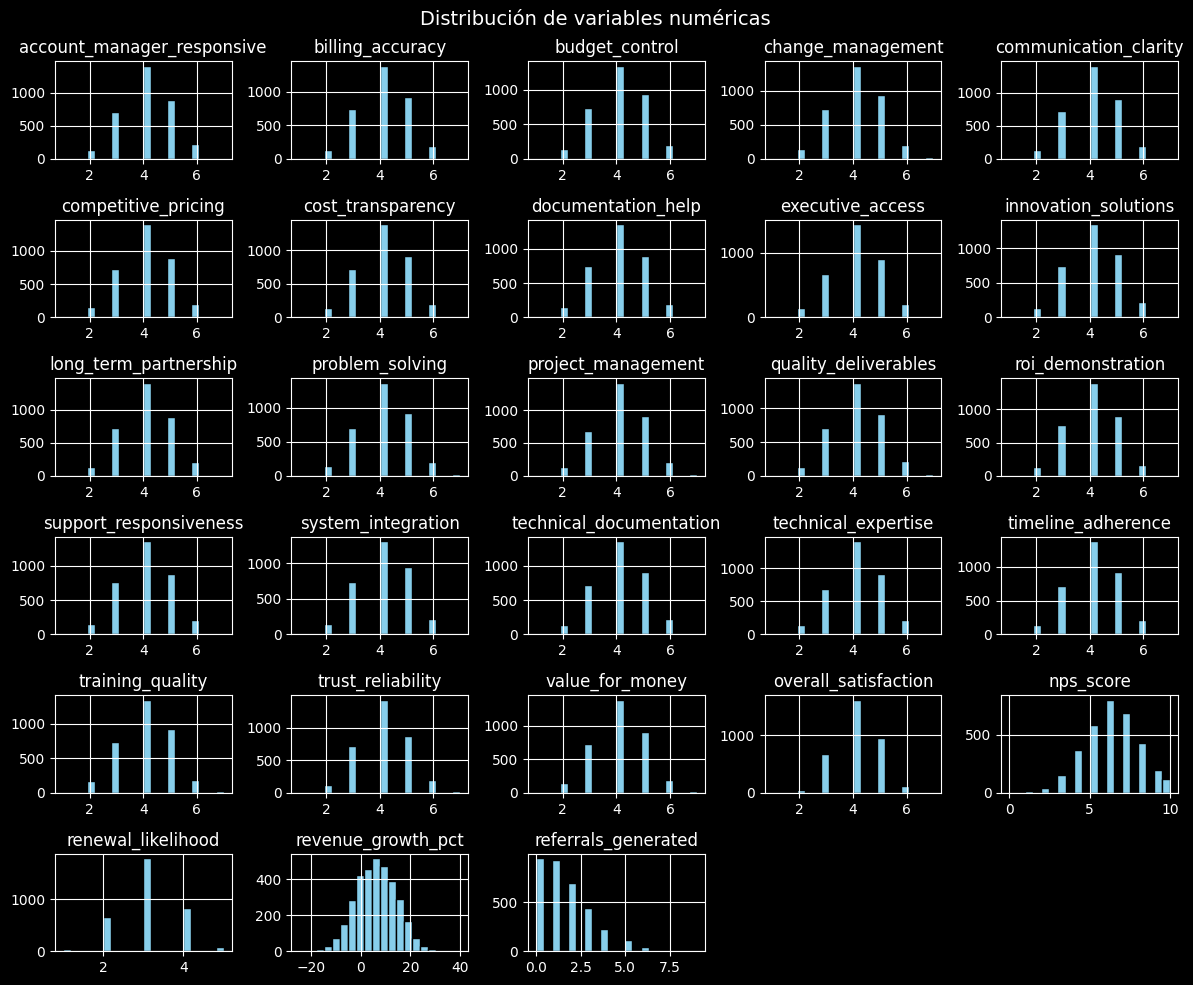

In [8]:
# Visualización de distribuciones de variables numéricas
num_cols = df.select_dtypes(exclude=["object"]).columns

df[num_cols].hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()

In [9]:
# Seleccionar variables para el análisis factorial (23 métricas de satisfacción)
df_fa = df[[
    "account_manager_responsive", "billing_accuracy", "budget_control", 
    "change_management", "communication_clarity", "competitive_pricing",
    "cost_transparency", "documentation_help", "executive_access",
    "innovation_solutions", "long_term_partnership", "problem_solving",
    "project_management", "quality_deliverables", "roi_demonstration",
    "support_responsiveness", "system_integration", "technical_documentation",
    "technical_expertise", "timeline_adherence", "training_quality",
    "trust_reliability", "value_for_money"
]].copy()

# Imputar valores nulos con la media
df_fa.fillna(df_fa.mean(), inplace=True)
#Verificar que no hay falores nulos depsués de la imputación
print("VALORES NULOS DESPUÉS DE LA IMPUTACIÓN:\n")
display(df_fa.isnull().sum())

VALORES NULOS DESPUÉS DE LA IMPUTACIÓN:



account_manager_responsive    0
billing_accuracy              0
budget_control                0
change_management             0
communication_clarity         0
competitive_pricing           0
cost_transparency             0
documentation_help            0
executive_access              0
innovation_solutions          0
long_term_partnership         0
problem_solving               0
project_management            0
quality_deliverables          0
roi_demonstration             0
support_responsiveness        0
system_integration            0
technical_documentation       0
technical_expertise           0
timeline_adherence            0
training_quality              0
trust_reliability             0
value_for_money               0
dtype: int64

## 4. Verificación de Supuestos para Análisis Factorial

In [10]:
# Calcular KMO y prueba de Bartlett para verificar adecuación de los datos
kmo_all, kmo_model = calculate_kmo(df_fa)
print(f"KMO global: {kmo_model:.3f}")

chi_square_value, p_value = calculate_bartlett_sphericity(df_fa)
print(f"Bartlett’s test: Chi² = {chi_square_value:.2f}, p = {p_value:.5f}")

KMO global: 0.959
Bartlett’s test: Chi² = 34357.04, p = 0.00000


c:\Users\maulo\OneDrive\Documentos\TEC\UNI\QUINTO\MULTIVARIADOS\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


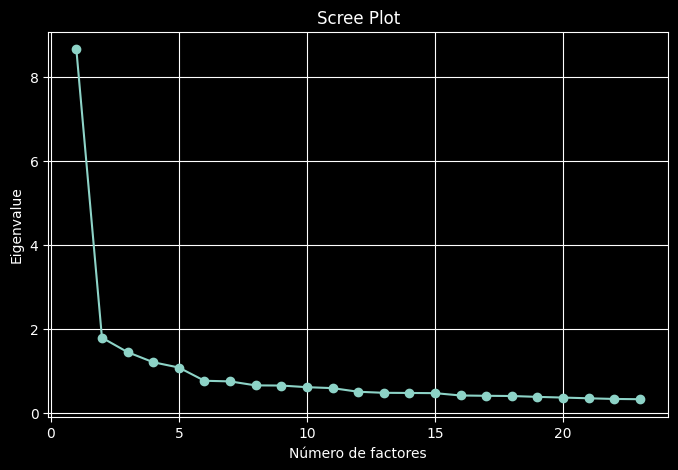

Factor 1: eigenvalue = 8.661
Factor 2: eigenvalue = 1.786
Factor 3: eigenvalue = 1.442
Factor 4: eigenvalue = 1.202
Factor 5: eigenvalue = 1.075
Factor 6: eigenvalue = 0.760
Factor 7: eigenvalue = 0.745
Factor 8: eigenvalue = 0.650
Factor 9: eigenvalue = 0.646
Factor 10: eigenvalue = 0.607
Factor 11: eigenvalue = 0.585
Factor 12: eigenvalue = 0.498
Factor 13: eigenvalue = 0.473
Factor 14: eigenvalue = 0.470
Factor 15: eigenvalue = 0.465
Factor 16: eigenvalue = 0.410
Factor 17: eigenvalue = 0.402
Factor 18: eigenvalue = 0.397
Factor 19: eigenvalue = 0.376
Factor 20: eigenvalue = 0.360
Factor 21: eigenvalue = 0.342
Factor 22: eigenvalue = 0.327
Factor 23: eigenvalue = 0.320


In [11]:
# Análisis de componentes principales para determinar número de factores (Scree Plot)
fa = FactorAnalyzer(rotation=None)
fa.fit(df_fa)
eigen_values, vects = fa.get_eigenvalues()

plt.figure(figsize=(8,5))
plt.plot(range(1, df_fa.shape[1]+1), eigen_values, marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de factores')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

for i, val in enumerate(eigen_values, start=1):
    print(f"Factor {i}: eigenvalue = {val:.3f}")

## 5. Determinación del Número de Factores

In [12]:
# Ajustar modelos factoriales con diferentes rotaciones y números de factores
# Modelo 1: 3 factores con rotación Varimax
fa3 = FactorAnalyzer(n_factors=3, rotation='varimax')
fa3.fit(df_fa)

# Modelo 2: 3 factores con rotación Promax
fa3p = FactorAnalyzer(n_factors=3, rotation='promax')
fa3p.fit(df_fa)

# Modelo 3: 5 factores con rotación Varimax
fa5 = FactorAnalyzer(n_factors=5, rotation='varimax')
fa5.fit(df_fa)

# Modelo 4: 5 factores con rotación Promax
fa5p = FactorAnalyzer(n_factors=5, rotation='promax')
fa5p.fit(df_fa)

c:\Users\maulo\OneDrive\Documentos\TEC\UNI\QUINTO\MULTIVARIADOS\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maulo\OneDrive\Documentos\TEC\UNI\QUINTO\MULTIVARIADOS\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maulo\OneDrive\Documentos\TEC\UNI\QUINTO\MULTIVARIADOS\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maulo\OneDrive\Documentos\TEC\UNI\QUINTO\MULTIVARIADOS\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_fini

,n_factors,5
,rotation,'promax'
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


## 6. Extracción de Factores

In [13]:
# Examinar cargas factoriales para modelos con 3 y 5 factores (Varimax)
loadings3 = pd.DataFrame(fa3.loadings_, index=df_fa.columns)
print("\n----------------------------------------------------------------\n")
print("CARGAS FACTORIALES - 3 FACTORES VARIMAX:")
print(loadings3)

loadings5 = pd.DataFrame(fa5.loadings_, index=df_fa.columns)
print("\n----------------------------------------------------------------\n")
print("CARGAS FACTORIALES - 5 FACTORES VARIMAX:")
print(loadings5)
print("\n----------------------------------------------------------------\n")


----------------------------------------------------------------

CARGAS FACTORIALES - 3 FACTORES VARIMAX:
                                   0         1         2
account_manager_responsive  0.250350  0.632447  0.201899
billing_accuracy            0.089682  0.163771  0.573995
budget_control              0.463660  0.296279  0.448903
change_management           0.463267  0.277735  0.450711
communication_clarity       0.248591  0.647542  0.210425
competitive_pricing         0.117255  0.123823  0.557497
cost_transparency           0.119732  0.141475  0.556309
documentation_help          0.200839  0.230788  0.152850
executive_access            0.235177  0.657038  0.200589
innovation_solutions        0.742539  0.262072  0.145345
long_term_partnership       0.236420  0.656783  0.177846
problem_solving             0.739237  0.253617  0.158124
project_management          0.460394  0.269834  0.474118
quality_deliverables        0.470195  0.270822  0.455217
roi_demonstration           0.110864 

In [14]:
# Cargas factoriales para modelos con rotación Promax
loadings3p = pd.DataFrame(fa3p.loadings_, index=df_fa.columns)
print("\n----------------------------------------------------------------\n")
print("CARGAS FACTORIALES - 3 FACTORES PROMAX:")
print(loadings3p)

loadings5p = pd.DataFrame(fa5p.loadings_, index=df_fa.columns)
print("\n----------------------------------------------------------------\n")
print("CARGAS FACTORIALES - 5 FACTORES PROMAX:")
print(loadings3p)
print("\n----------------------------------------------------------------\n")


----------------------------------------------------------------

CARGAS FACTORIALES - 3 FACTORES PROMAX:
                                   0         1         2
account_manager_responsive -0.013819  0.732819 -0.020872
billing_accuracy           -0.134683  0.020616  0.670736
budget_control              0.385162  0.066750  0.338417
change_management           0.393224  0.039529  0.346827
communication_clarity      -0.026620  0.752990 -0.013901
competitive_pricing        -0.069316 -0.045833  0.652524
cost_transparency          -0.074094 -0.021114  0.644509
documentation_help          0.129273  0.189877  0.059380
executive_access           -0.047752  0.776290 -0.025311
innovation_solutions        0.906368 -0.028330 -0.142922
long_term_partnership      -0.038516  0.782153 -0.055489
problem_solving             0.901652 -0.042805 -0.122349
project_management          0.385450  0.022448  0.381023
quality_deliverables        0.405320  0.024757  0.352607
roi_demonstration          -0.087250 -

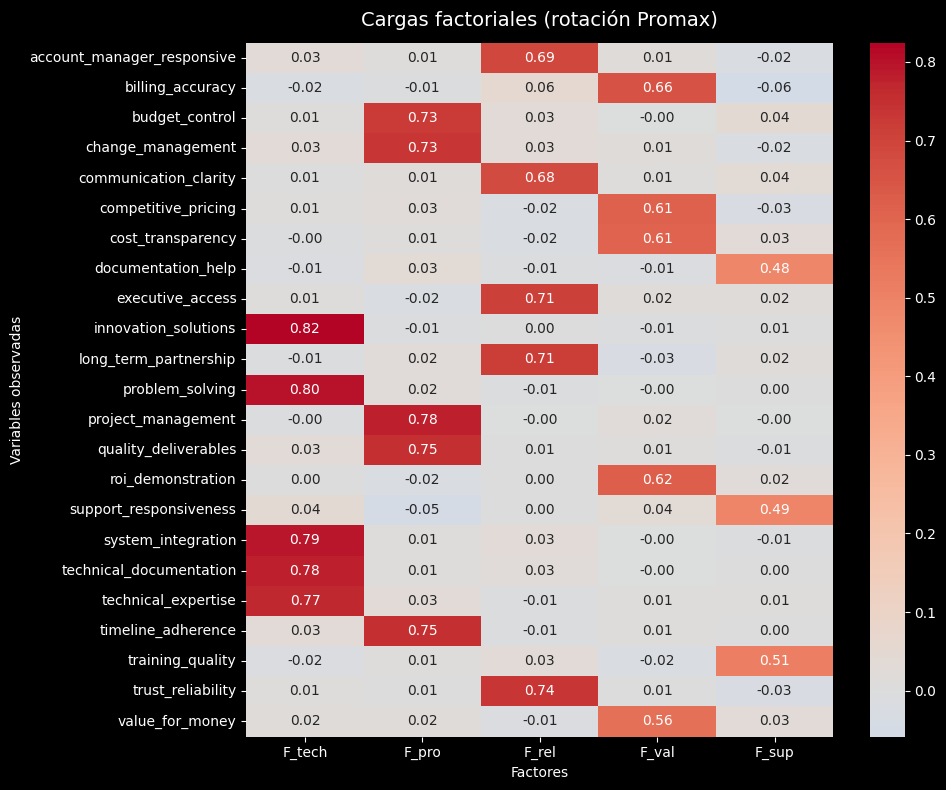

In [15]:
# Visualización de cargas factoriales para el modelo final (5 factores Promax)
loadings = pd.DataFrame(fa5p.loadings_, 
                        index=df_fa.columns, 
                        columns=["F_tech", "F_pro", "F_rel", "F_val", "F_sup"])

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Cargas factoriales (rotación Promax)", fontsize=14, pad=12)
plt.xlabel("Factores")
plt.ylabel("Variables observadas")
plt.tight_layout()
plt.show()

## 7. Interpretación de Factores

In [16]:
# Varianza explicada por cada factor
fa5p.get_factor_variance()

(array([3.15713438, 2.80304445, 2.5117318 , 1.88212421, 0.74705725]),
 array([0.13726671, 0.1218715 , 0.10920573, 0.08183149, 0.03248075]),
 array([0.13726671, 0.25913821, 0.36834394, 0.45017543, 0.48265618]))

In [17]:
# Calcular puntuaciones factoriales y correlaciones entre factores
scores = fa5p.transform(df_fa)  # (n_muestras, n_factores)
scores_df = pd.DataFrame(scores, columns=["F_tech", "F_pro", "F_rel", "F_val", "F_sup"])
scores_corr = scores_df.corr()  # correlación empírica entre factores
print(scores_corr.round(3))

        F_tech  F_pro  F_rel  F_val  F_sup
F_tech   1.000  0.752  0.705  0.540  0.733
F_pro    0.752  1.000  0.731  0.698  0.702
F_rel    0.705  0.731  1.000  0.607  0.775
F_val    0.540  0.698  0.607  1.000  0.631
F_sup    0.733  0.702  0.775  0.631  1.000


c:\Users\maulo\OneDrive\Documentos\TEC\UNI\QUINTO\MULTIVARIADOS\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 8. Validación del Modelo

c:\Users\maulo\OneDrive\Documentos\TEC\UNI\QUINTO\MULTIVARIADOS\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


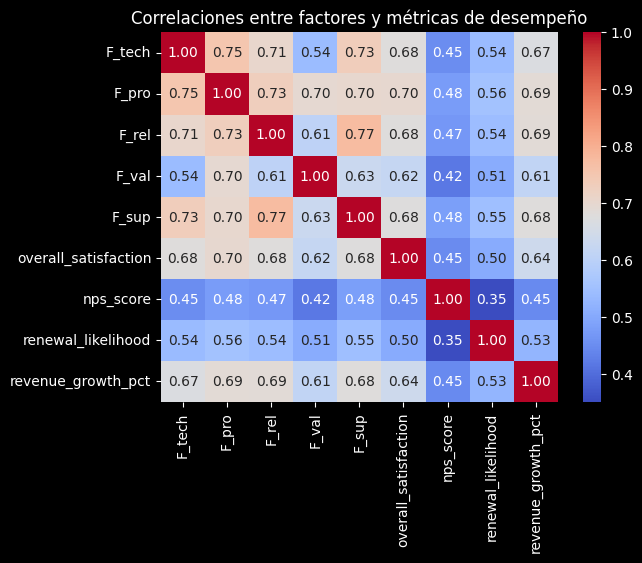

In [18]:
# Correlaciones entre factores latentes y métricas de desempeño del negocio
scores = fa5p.transform(df_fa)
scores_df = pd.DataFrame(scores, columns=["F_tech", "F_pro", "F_rel", "F_val", "F_sup"])

valid_df = pd.concat([
    scores_df,
    df[["overall_satisfaction","nps_score","renewal_likelihood","revenue_growth_pct"]].reset_index(drop=True)
], axis=1)

corr = valid_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre factores y métricas de desempeño")
plt.show()

In [19]:
# Tabla de correlaciones específicas entre factores y métricas clave
corr = valid_df.corr().round(2)
corr.loc[["F_tech", "F_pro", "F_rel", "F_val", "F_sup"],
         ["overall_satisfaction","nps_score","renewal_likelihood","revenue_growth_pct"]]

,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct
F_tech,0.68,0.45,0.54,0.67
F_pro,0.70,0.48,0.56,0.69
F_rel,0.68,0.47,0.54,0.69
F_val,0.62,0.42,0.51,0.61
F_sup,0.68,0.48,0.55,0.68


## 9. Modelo de Regresión para Predicción de Satisfacción

In [20]:
# Regresión lineal para predecir satisfacción general usando los factores
modelo = LinearRegression()

X = valid_df[["F_tech", "F_pro", "F_rel", "F_val", "F_sup"]]
y = valid_df["overall_satisfaction"]
modelo.fit(X,y)

y_predict = modelo.predict(X)

print("R²:", r2_score(y, y_predict))
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

R²: 0.6025159270931681
Coeficientes: [0.18861835 0.1602156  0.14730162 0.16806486 0.14581758]
Intercepto: 4.125588235294118


C:\Users\maulo\AppData\Local\Temp\ipykernel_51972\2134176675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.index, y=coefs.values, palette="viridis")


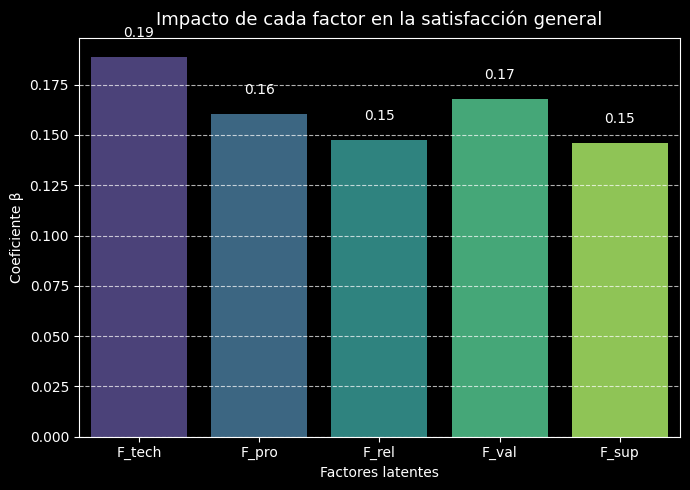

In [21]:
# Visualización del impacto de cada factor en la satisfacción
coefs = pd.Series(modelo.coef_, index=["F_tech", "F_pro", "F_rel", "F_val", "F_sup"])

plt.figure(figsize=(7,5))
sns.barplot(x=coefs.index, y=coefs.values, palette="viridis")
plt.title("Impacto de cada factor en la satisfacción general", fontsize=13, pad=10)
plt.ylabel("Coeficiente β")
plt.xlabel("Factores latentes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(coefs):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

## 11. Conclusiones

El análisis factorial identificó cinco factores principales que explican la satisfacción del cliente en TechnoServe:

1. **Factor Técnico (F_tech)**: Competencia técnica, calidad de entregables, innovación
2. **Factor de Proyecto (F_pro)**: Gestión de proyectos, adherencia a timelines, manejo de cambios
3. **Factor Relacional (F_rel)**: Confianza, partnership a largo plazo, acceso ejecutivo
4. **Factor de Valor (F_val)**: Precios competitivos, demostración de ROI, transparencia de costos 
5. **Factor de Soporte (F_sup)**: Responsividad de soporte, documentación, capacitación

Los resultados muestran que el factor técnico tiene el mayor impacto en la satisfacción general (r = 0.73) y el crecimiento de ingresos (r = 0.71), sugiriendo que las mejoras en la excelencia técnica deberían ser prioritarias para aumentar la lealtad y el rendimiento comercial.
